In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
file_path = r'Downloads\data.xls'
df = pd.read_csv(file_path)
try:
    df = pd.read_csv(file_path)
    # Display the first few rows of the DataFrame
    df.head()
except FileNotFoundError:
    print(f"File not found at the specified path: {file_path}")

In [3]:
#df.shape       # Display the shape of the DataFrame

In [4]:
#df.info()      # Display information about the DataFrame

In [5]:
df.duplicated().sum()     # Print the count of duplicate rows

0

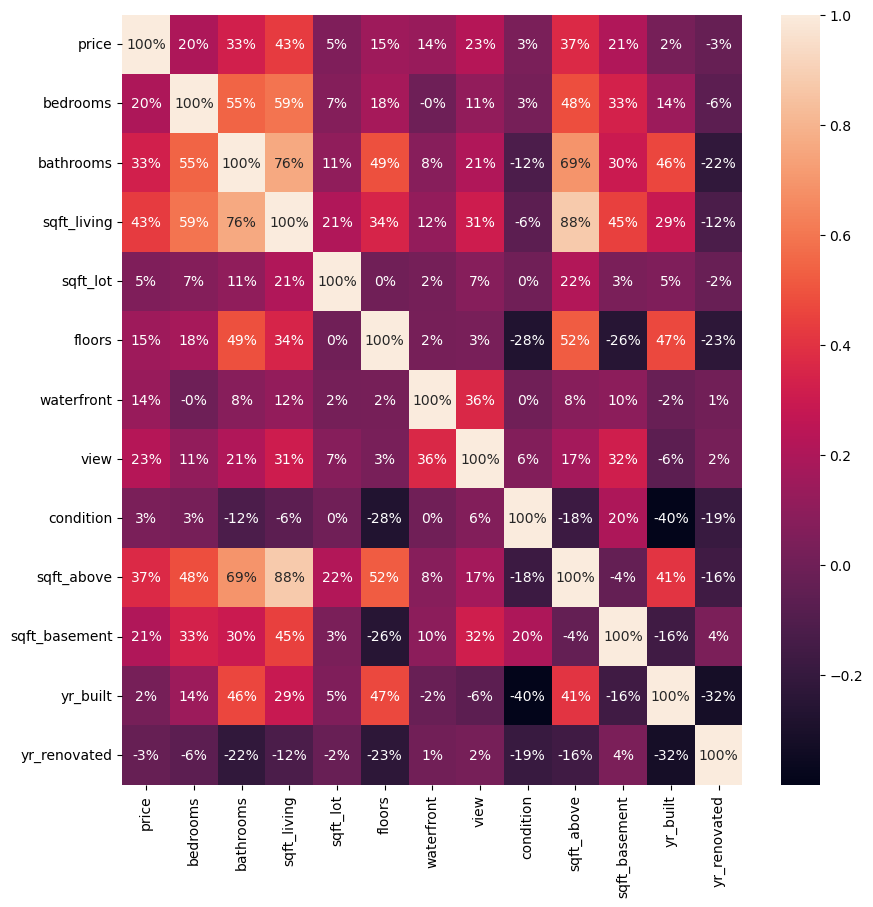

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.0%')
plt.show()

In [7]:
#Convert price, bedrooms, bathrooms, and floors to int64, and check data types.
df['price'] = df['price'].astype('int64')
df['bedrooms'] = df['bedrooms'].astype('int64')
df['bathrooms'] = df['bathrooms'].astype('int64')
df['floors'] = df['floors'].astype('int64')
print('NEW DATA TYPES : ', df.dtypes)

NEW DATA TYPES :  date             object
price             int64
bedrooms          int64
bathrooms         int64
sqft_living       int64
sqft_lot          int64
floors            int64
waterfront        int64
view              int64
condition         int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
street           object
city             object
statezip         object
country          object
dtype: object


In [8]:
#check outliers in price , if they valid data or not
print('PRICE > 10.0M : ', df[df['price'] > 10000000])

PRICE > 10.0M :                       date     price  bedrooms  bathrooms  sqft_living  \
4346  2014-06-23 00:00:00  12899000         3          2         2190   
4350  2014-07-03 00:00:00  26590000         3          2         1180   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
4346     11394       1           0     0          3        1550   
4350      7793       1           0     0          4        1180   

      sqft_basement  yr_built  yr_renovated             street     city  \
4346            640      1956          2001    5426 40th Ave W  Seattle   
4350              0      1992             0  12005 SE 219th Ct     Kent   

      statezip country  
4346  WA 98199     USA  
4350  WA 98031     USA  


In [9]:
#The huge price for buildings with a lot of land.keep lines,are valid data, check if they are any outliers with price = 0.
print('PRICE = 0 : ', df[df['price'] == 0])

PRICE = 0 :                       date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4354  2014-05-05 00:00:00      0         3          1         1490     10125   
4356  2014-05-05 00:00:00      0         4          2         2600      5390   
4357  2014-05-05 00:00:00      0         6          2         3200      9200   
4358  2014-05-06 00:00:00      0         5          3         3480     36615   
4361  2014-05-07 00:00:00      0         5          1         1500      7112   
4362  2014-05-07 00:00:00      0         4          4         3680     18804   
4374  2014-05-09 00:00:00      0         2          2         2200    188200   
4376  2014-05-09 00:00:00      0         4          2         2170     10500   
4382  2014-05-12 00:00:00      0         5          4         4630      6324   
4383  2014-05-13 00:00:00      0         5          4         4430      9000   
4385  2014-05-13 00:00:00      0         4          4         5030     11023   
4386  2014-05-13 00:00:00  

In [10]:
print('PRICE = 0 : ', df[df['price'] == 0].shape)

PRICE = 0 :  (49, 18)


In [11]:
#replace values with price = 0
df['price'].replace(0, np.nan, inplace=True)

In [12]:
print('PRICE = 0 : ', df[df['price'] == 0].shape)

PRICE = 0 :  (0, 18)


In [13]:
print('MISSING VALUES : ', df.isna().sum())

MISSING VALUES :  date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64


In [14]:
# replace the na price values with the mean price
df['price'].fillna(df['price'].mean(), inplace=True)


In [15]:
print('MISSING VALUES : ', df.isna().sum())

MISSING VALUES :  date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [16]:
# transform city in numerical values 
ville = pd.get_dummies(df['city'])
ville.head()

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# delete the city column, country, statezip, street, date ,view , add  ville columns to  dataframe
df.drop(['city', 'country', 'statezip', 'street', 'date','view'], axis=1, inplace=True)
dt = pd.concat([df, ville], axis=1)
dt.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,313000.0,3,1,1340,7912,1,0,3,1340,0,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5,2,3650,9050,2,0,5,3370,280,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3,2,1930,11947,1,0,4,1930,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2,2000,8030,1,0,4,1000,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2,1940,10500,1,0,4,1140,800,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Z-Score Outlier Removal
df['sqft_living_zscre'] = zscore(df['sqft_living'])
df['sqft_lot_zscre'] = zscore(df['sqft_lot'])
df['sqft_above_zscre'] = zscore(df['sqft_above'])
df['sqft_basement_zscre'] = zscore(df['sqft_basement'])

df = df[(df.sqft_living_zscre < 3) & (df.sqft_living_zscre > -3)]
df = df[(df.sqft_lot_zscre < 3) & (df.sqft_lot_zscre > -3)]
df = df[(df.sqft_above_zscre < 3) & (df.sqft_above_zscre > -3)]
df = df[(df.sqft_basement_zscre < 3) & (df.sqft_basement_zscre > -3)]

In [19]:
df.drop(columns=['sqft_living_zscre','sqft_lot_zscre','sqft_above_zscre','sqft_basement_zscre'], inplace=True)

In [20]:
# scale with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Cols = list(dt.columns)
scaled_df = scaler.fit_transform(dt[Cols])
scaled_df = pd.DataFrame(scaled_df, columns=Cols)

In [21]:
num_samples, num_dimensions = scaled_df.shape

print("Number of Samples:", num_samples)
print("Number of Dimensions:", num_dimensions)

Number of Samples: 4600
Number of Dimensions: 56


In [22]:
# Assuming 'df' is your DataFrame
feature_names = df.columns.tolist()

# Print or use the feature names as needed
print("Feature Names:", feature_names)

Feature Names: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


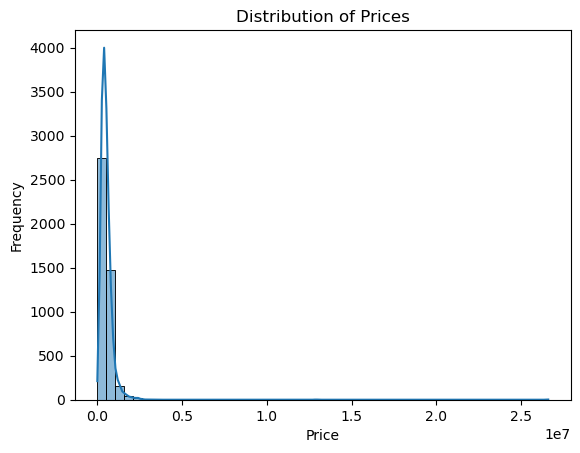

In [23]:
#Target Variable Analysis and Transformation
sns.histplot(df['price'], bins=50, kde=True)             
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [24]:
#We create y, the target variable, based on scaled_df['price']. We create X, the features, based on scaled_df, without price. 

y = scaled_df['price']
X = scaled_df.drop(['price'], axis=1)

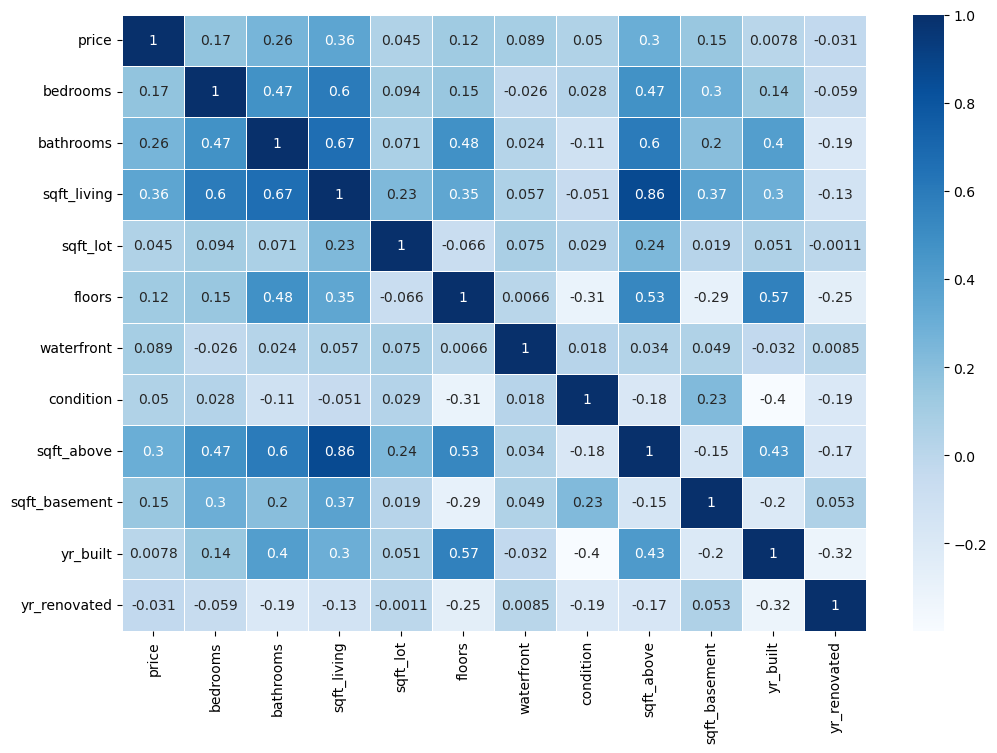

In [25]:
plt.figure(figsize=(12, 8))         #Feature Selection (example using heatmap)
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.show()

In [26]:
#split the data into train and test sets,
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Print the shapes of the sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (4140, 55) (4140,)
Test set shape: (460, 55) (460,)


In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train) 

LinearRegression()

In [29]:
pred = lr.predict(X_test) 

In [30]:
#score = r2_score(y_test, pred)
accuracy_test= lr.score(X_test,y_test)


In [31]:
#score
print("Linear Regression accuracy test: {}%".format(int(round(accuracy_test * 100))))

Linear Regression accuracy test: 70%


In [32]:
mae=mean_absolute_error(y_test,pred)
print("The mean absolute error :",mae)


mes=mean_squared_error(y_test,pred)
print("The mean squared error :",mes)

The mean absolute error : 0.22054488555537138
The mean squared error : 0.1124736863911142


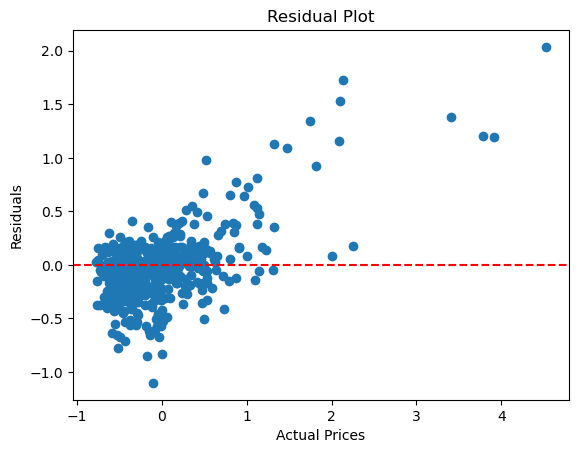

In [33]:
# We can also create a residual plot to check the model's performance
residuals = y_test - pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

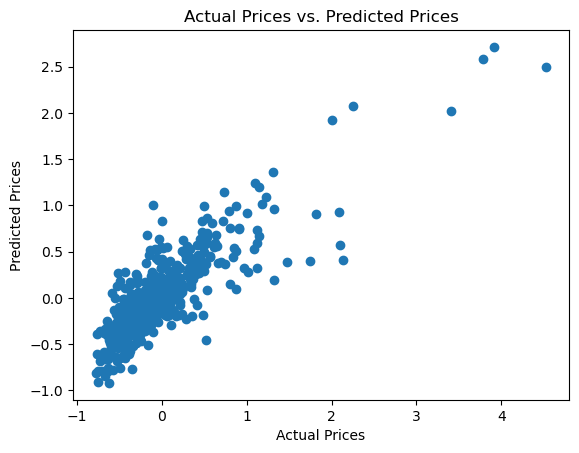

In [34]:
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

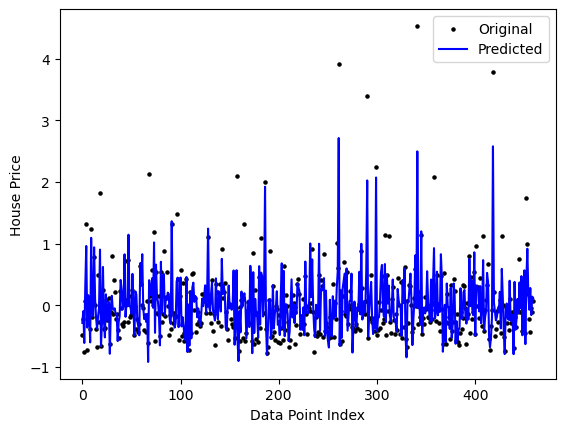

In [35]:

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="Black", label="Original")
plt.plot(x_ax, pred, lw=1.5, color="Blue", label="Predicted")
plt.xlabel('Data Point Index') 
plt.ylabel('House Price')
plt.legend()
plt.show()